<h1 align='center'>INSY 5337 DATA MINING</h1>
<h2 align='center'>Project: Hotel Booking Cancellation Prediction</h2>
<h3 align='center'>Group 1: Aditi Chauhan, Prachi Mahapatra, Abhishek Puranik, Sanil Patel</h3>

In [1]:
#import all required libraries

import warnings           ## Because of the use of heavy libraries, system prompts us with numerous warnings.
warnings.filterwarnings("ignore")  ##To avoid this, we have imported library 'warnings'.

import numpy as np
import pandas as pd
import seaborn as sns     # seaborn and matplotlib libraries help in visualisations.
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pylab as plab
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [2]:
# Fetching csv file as dataframe.
filename= 'hotel_bookings.csv'
df=pd.read_csv(filename)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<h3 align='center'>DATA PRE-PROCESSING</h3>

In [4]:
# dropping the following the listed column that do not significantly impact our target variable.
df.drop(columns=['agent', 'company', 'reservation_status', 'reservation_status_date','country'],inplace=True)
df.dropna(axis=0,inplace=True)

In [5]:
df.shape

(119386, 27)

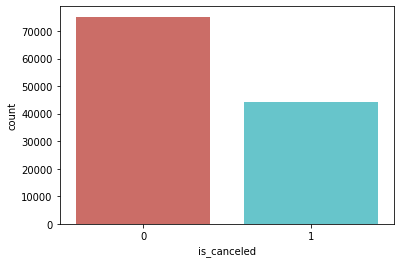

In [6]:
# plotting the count of 'is_canceled' in our databse. 0 = did not cancel, 1 = cancel
plt=sns.countplot(x='is_canceled',data=df,palette='hls')
plt

In [7]:
#Using labelencoder to convert all categorical and string data into integer
L_Encoder = preprocessing.LabelEncoder() 
df['hotel'] = L_Encoder.fit_transform(df['hotel'])
df['arrival_date_month'] = L_Encoder.fit_transform(df['arrival_date_month'])

df['meal'] = L_Encoder.fit_transform(df['meal'])

df['market_segment'] = L_Encoder.fit_transform(df['market_segment'])

df['distribution_channel'] = L_Encoder.fit_transform(df['distribution_channel'])

df['reserved_room_type'] = L_Encoder.fit_transform(df['reserved_room_type'])

df['assigned_room_type'] = L_Encoder.fit_transform(df['assigned_room_type'])

df['deposit_type'] = L_Encoder.fit_transform(df['deposit_type'])

df['customer_type'] = L_Encoder.fit_transform(df['customer_type'])

In [ ]:
# Apply OneHotEncoder to get Rid of the 'variable' values and convert them into 'integers'

In [8]:
cat_variables=['hotel','arrival_date_month','meal','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type']
for var in cat_variables:
    
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(df[var],prefix=var)
    df=df.join(cat_list)
    
cat_variables=['hotel','arrival_date_month','meal','market_segment','distribution_channel','assigned_room_type','deposit_type','customer_type']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_variables]
    

In [14]:
#Storing all variables to df_final
df_final=df[to_keep]
df_final.columns.values

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_0', 'hotel_1', 'arrival_date_month_0',
       'arrival_date_month_1', 'arrival_date_month_2',
       'arrival_date_month_3', 'arrival_date_month_4',
       'arrival_date_month_5', 'arrival_date_month_6',
       'arrival_date_month_7', 'arrival_date_month_8',
       'arrival_date_month_9', 'arrival_date_month_10',
       'arrival_date_month_11', 'meal_0', 'meal_1', 'meal_2', 'meal_3',
       'meal_4', 'market_segment_0', 'market_segment_1',
       'market_segment_2', 'market_segment_3', 'market_segment_4',
       'market_segment_5

In [15]:
df_final.shape

(119386, 69)

In [16]:
# X= independent variables, y= dependent variable
X = df_final.loc[:,df_final.columns !='is_canceled']   #Selecting the entire dataset, WITHOUT target variable
y = df_final.loc[:,df_final.columns == 'is_canceled']  #Selecting the target variable

In [17]:
#Splitting dataset into 3 parts:

train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# train dataset is now 70% of the entire data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=1)

# test dataset is now 20% of the initial data set
# validation dataset is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), 
                                                random_state=1) 


In [18]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

83570
23878
11938


<h3 align='center'>LOGISTIC REGRESSION</h3>

In [ ]:
#The Recursive Feature Elimination (RFE) method is a feature selection approach.
#It works by recursively removing attributes and building a model on those attributes that remain. 
#It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting 
#the target attribute.

In [19]:
y_log = y_train
X_log = X_train

logreg=LogisticRegression()

rfe=RFE(logreg,10)
rfe=rfe.fit(X_log,y_log)

print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False  True  True False
  True  True  True  True False  True False False]
[55 57 48 50 41 36 25 22 29  5  1  3 16 28 58 53  1  6 23 24 46 31 47 32
 27 54 43 26 44 30 45 34 52  2 40 56 19 33 35 18 37 49  8  1 17 51  4  9
 59 12 14 13 21 38 15 11  7  1  1 39  1  1  1  1 20  1 10 42]


In [20]:
# Sorting the variables on the basis of ranking, with 1 being 'variable that affect that affects target variable the most'.

selected_rfe_features=pd.DataFrame({'Feature':list(X_log.columns),'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking').head(10)

,Feature,Ranking
60,assigned_room_type_11,1
65,customer_type_1,1
16,required_car_parking_spaces,1
63,deposit_type_2,1
61,deposit_type_0,1
43,market_segment_6,1
62,deposit_type_1,1
57,assigned_room_type_8,1
10,previous_cancellations,1
58,assigned_room_type_9,1


In [21]:
#Selecting all 10 variables with ranking 1:

cols=['assigned_room_type_11','deposit_type_2','deposit_type_1','market_segment_6','assigned_room_type_9','deposit_type_0','customer_type_1','previous_cancellations','assigned_room_type_8', 'required_car_parking_spaces']
X_edit=X_log[cols]
y_edit=y_log['is_canceled']

In [22]:
# Implementing the Logit function to check for p-value

logit_model=sm.Logit(y_edit,X_edit)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.477469
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                83570
Model:                          Logit   Df Residuals:                    83560
Method:                           MLE   Df Model:                            9
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.2758
Time:                        20:36:39   Log-Likelihood:                -39902.
converged:                      False   LL-Null:                       -55100.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
assigned_room_type_11          16.1860    472.524      0.034      0.973    -909.944     942.316
deposit_type_2

C:\Users\ADITI\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [23]:
# We'll remove all the variables that have p-value > 0.05

cols=['deposit_type_2','deposit_type_1','market_segment_6','assigned_room_type_9','deposit_type_0','customer_type_1','previous_cancellations','assigned_room_type_8']
X_edit=X_log[cols]
y_edit=y_log['is_canceled']

In [24]:
#Apply logistic regression to train model.

logreg=LogisticRegression()
logreg.fit(X_edit, y_edit)
pred_logreg = pd.DataFrame(logreg.predict_proba(X_test[cols]))

# Check for model accuarcy with different threshold probabilities.

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

acc_dict={}
for i in threshold_list:
    print ('\nFor Threshold = {}'.format(i))
    y_logPredict = pred_logreg.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test, y_logPredict.iloc[:,1])
    
    print('Our testing accuracy is: ',test_accuracy*100)


Threshold Probability:  0.4 
Maximum Acuuracy:  0.7682385459418711


<p>We are getting maximum accuracy of <b>76.82%</b> at threshold probability of <b>0.4.</b></p>

In [ ]:
#Confusion Matrix:
#It is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test 
#data for which the true values are known.
#The sum of the numbers in top-left and bottom-right gives the number of values predicted correctly.
#The sum of the numbers in top-right and bottom-left gives number of values predicted wrong.

[[14939   109]
 [ 5425  3405]]


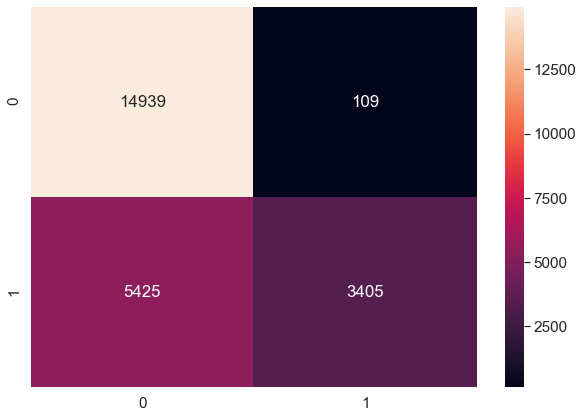

In [25]:
y_logPredict = pred_logreg.applymap(lambda x: 1 if x>0.4 else 0)
cm_log = confusion_matrix(y_test,y_logPredict.iloc[:,1])
print(cm_log)

df_cm_log = pd.DataFrame(cm_log, index = (0, 1), columns = (0, 1))
plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm_log, annot=True, fmt='g')

<h3 align='center'>DECISION TREE</h3>

In [26]:
X_dTree = X_train
y_dTree = y_train

In [27]:
# Applying decision tree on data.

clf = DecisionTreeClassifier(criterion="gini", max_depth=21)

clf.fit(X_dTree, y_dTree)
#dt_b_hpt=clf.score(X_test,y_test)

y_dtPredict_g=clf.predict(X_test)
print('Accuracy of decision tree: ',metrics.accuracy_score(y_test, y_dtPredict_g)*100)

Accuracy of decision tree:  82.89220202697042


[[13180  1868]
 [ 2217  6613]]


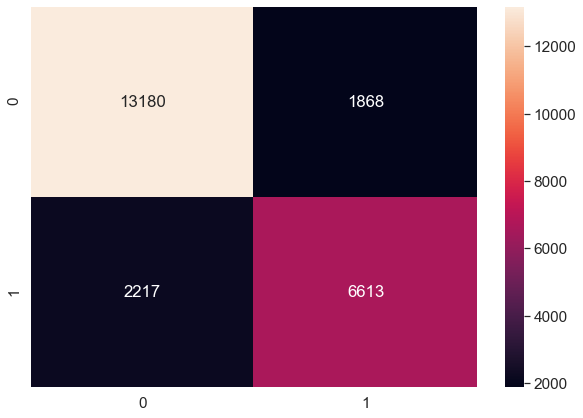

In [28]:
# Confusion matrix

cm_dt = confusion_matrix(y_test, y_dtPredict_g) # rows = truth, cols = prediction
print(cm_dt)

df_cm_dt = pd.DataFrame(cm_dt, index = (0, 1), columns = (0, 1))
plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm_dt, annot=True, fmt='g')


<p> We implemented decision tree over various criterias (entropy and gini index) and different depths.</p>
<p>We got maximum accuracy with decision tree: <b>criteria= 'gini index' and max depth = '21'</b>.</p>

<h3 align='center'>CLASSIFICATION OF VALIDATION DATA</h3>

<p>After considering the accuracy levels of both the models, we have decided to deploy <b>decision tree model</b> to classify the validation data.</p>

In [29]:
val_predict_clf=clf.predict(X_val)

[[6596  932]
 [1074 3336]]


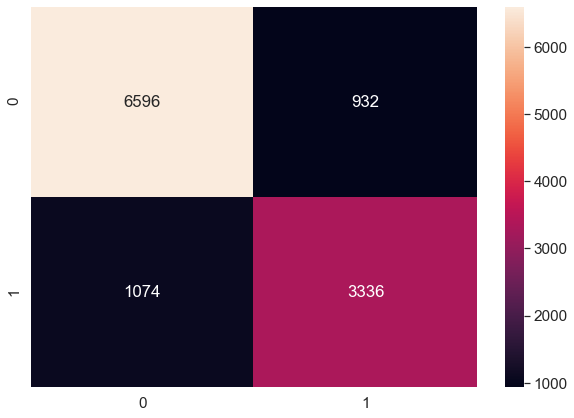

In [30]:
cm_dt = confusion_matrix(y_val, val_predict_clf) # rows = truth, cols = prediction
print(cm_dt)

df_cm_dt = pd.DataFrame(cm_dt, index = (0, 1), columns = (0, 1))
plab.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm_dt, annot=True, fmt='g')

In [31]:
print('Accuracy of decision tree over validation data: ',metrics.accuracy_score(y_val, val_predict_clf)*100)

Accuracy of decision tree over validation data:  83.19651532920088


In [32]:
print(val_predict_clf)

[0 1 0 ... 1 1 0]


In [33]:
# Exporting the results to csv file.
y_df = pd.DataFrame(data = val_predict_clf, columns = ['classified_y'], index = X_val.index.copy())
y_df_out = pd.merge(X_val, y_df, how = 'left', left_index = True, right_index = True)
y_df_out.to_csv('classification.csv')

In [ ]:
############################################################################################################

<h3>To identify our target customers on the basis of probability of cancellation, we'll be using logistic regression over validation data.</h3>

In [34]:
THRESHOLD = 0.4  # Selecting the threshold of 0.4 as it was providing maximum accuracy.
preds = (logreg.predict_proba(X_val[cols])[:,1] > THRESHOLD)
print('Accuracy of logistic regression on validation data: ',metrics.accuracy_score(y_val, preds)*100)

Accuracy of logistic regression on validation data:  76.16853744345786


In [35]:
arr_val = logreg.predict_proba(X_val[cols])

In [36]:
arr_val = np.around(arr_val, decimals=2)
print(arr_val)

[[0.83 0.17]
 [0.83 0.17]
 [0.83 0.17]
 ...
 [0.63 0.37]
 [0.   1.  ]
 [0.83 0.17]]


In [37]:
# Exporting the results to csv file.
y_df = pd.DataFrame(data = arr_val, columns = ['not_cancel_prob', 'not_prob'], index = X_val.index.copy())
y_df_out = pd.merge(X_val, y_df, how = 'left', left_index = True, right_index = True)
y_df_out.to_csv('cancellation.csv')

In [42]:
#Selecting our target range of customers:
filter_arr = []
count=0
for element in arr_val[:,1]:
    
    #Alter the lower and upper limits to get the desired range of customers:
    #Category 1: 0.0-0.36
    #Category 2: 0.36-0.4
    #Category 3: 0.4-0.51
    #Category 4: 0.51-0.1
    
    if element >= 0.4 and element <=0.51:
        count=count+1
        (filter_arr.append(True))
    else:
        filter_arr.append(False)

print(filter_arr)
print('count',count)

[True, True, True, True, True, True, False, False, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, False, True, True, False, False, True, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, True, True, True, True, False, True, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, 

In [30]:
y_df = pd.DataFrame(data = filter_arr, columns = ['y_predicted'], index = y_val.index.copy())
y_df_out = pd.merge(X_val, y_df, how = 'left', left_index = True, right_index = True)

In [31]:
y_df_out.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_10,assigned_room_type_11,deposit_type_0,deposit_type_1,deposit_type_2,customer_type_0,customer_type_1,customer_type_2,customer_type_3,y_predicted
108043,44,2017,12,19,2,1,2,0.0,0,0,...,0,0,1,0,0,0,0,1,0,False
100141,192,2016,43,21,0,2,2,0.0,0,0,...,0,0,1,0,0,0,0,0,1,False
113529,8,2017,23,8,0,1,1,0.0,0,0,...,0,0,1,0,0,0,0,1,0,False
83426,81,2016,5,30,1,1,2,0.0,0,0,...,0,0,1,0,0,0,0,1,0,False
83425,81,2016,5,30,1,1,2,0.0,0,0,...,0,0,1,0,0,0,0,1,0,False


In [33]:
y_df_out.to_csv('cancellation.csv')